## Images for figure 2, model validation

Here the images for the figure model validation are processed within a jupyter-notebook. The annotation were drawn in napari, but are here visualised with clesperanto imshow and a respective function.

The images include:
- a raw intensity image of the training and test dataset
- an annotated image of the training dataset
- a predicted image by the classifier
- a annotated image for comparison with the classifier

In [1]:
import apoc
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import pyclesperanto_prototype as cle

from napari.utils.colormaps import low_discrepancy_image, label_colormap

import sys
sys.path.append("../../")
from quapos_lm import scale_bar_image, predict_image

In [2]:
# Load classifier
quapos_lm = apoc.ObjectSegmenter(opencl_filename = "../../01-training-and-validation/02-quapos-lm.cl")
quapos_lm.feature_importances()

{'gaussian_blur=1': 0.32557488170342097,
 'difference_of_gaussian=1': 0.4231073391932076,
 'laplace_box_of_gaussian_blur=1': 0.25131777910337144}

In [3]:
# Define path where processed images are stored
save_path = "../../plots-images/quapos-paper/figure-2-images/"

### Visualisation of the training data

Here the images from the training data are turned into a figure. Hence, one image of the training dataset is loaded. The annotated image is actually artificially computed, the ground truth annotation shown in the image was not used to train the classifier, but is used here for better visualisation.

#### Compute intensity image

In [4]:
# Define path were training data is stored
training_data = "../../data/02-data-for-pixel-classifier/training-data/"

In [5]:
# Load and crop the image
training_image = cle.imread(training_data + "b-cropped-renamed/g.tif")
training_image = training_image[15, 10:90, 0:80]

In [6]:
# Compute a scale bar
scale_bar, scale_colour = scale_bar_image(training_image,
                                          scale_length=10,
                                          micron_length=0.323,
                                          thickness=2)

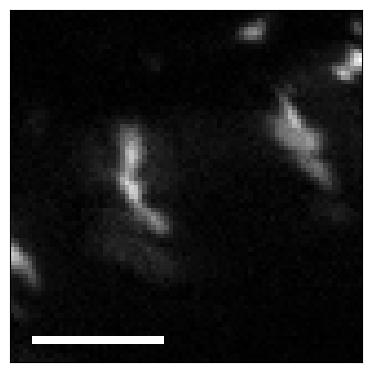

In [7]:
# Define figsize and subplots
fig, axs = plt.subplots(1, 2, figsize=(10,10))

# Remove unwanted subplots slot
axs[1].remove()

# Show intensity image and scale bar
cle.imshow(training_image, plot = axs[0])
cle.imshow(scale_bar, plot=axs[0], colormap=scale_colour)

# Remove ticks
axs[0].tick_params(left = False,
                right = False,
                labelleft = False,
                labelbottom = False, 
                bottom = False)

plt.savefig(save_path + "03-a-training-data-intensity-image.png",
            dpi=300,
            bbox_inches="tight")

#### Load annotation

In [8]:
# Load the annotated image and crop
annotated_image = cle.imread(training_data + "m-training-data-image-for-figure/g.tif")

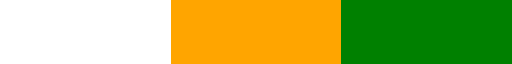

In [9]:
# Define colormap to display annotation over intensity image properly
annotation_cmap = matplotlib.colors.ListedColormap(["None", "orange", "green"])
annotation_cmap

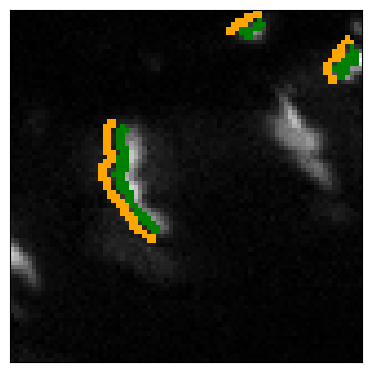

In [10]:
# Define figsize and subplots
fig, axs = plt.subplots(1, 2, figsize=(10,10))

# Remove unwanted subplots slot
axs[1].remove()

# Show intensity image and scale bar
cle.imshow(training_image, plot=axs[0])
cle.imshow(annotated_image, plot=axs[0], colormap=annotation_cmap)

# Remove ticks
axs[0].tick_params(left = False,
                right = False,
                labelleft = False,
                labelbottom = False, 
                bottom = False)

plt.savefig(save_path + "03-b-training-data-annotated.png",
            dpi=300,
            bbox_inches="tight")

### Visualisation of the test data

Here the images from the test dataset are loaded and turned into a figure. The following images are computed:

- test dataset intensity image
- test dataset prediction
- test dataset ground truth annotation for comparison with prediction

#### Intensity image

Since the test and training image were obtained with the same microscopy and objective, the same scale bar will be used for the visualisation.

In [11]:
# Define file path where test dataset is stored
test_data = "../../data/02-data-for-pixel-classifier/test-data/"

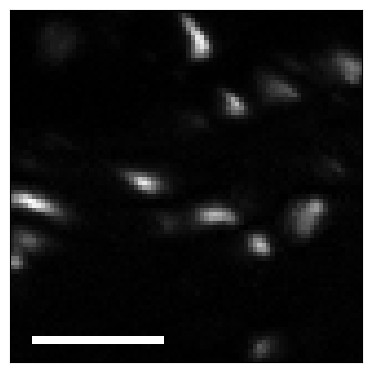

In [12]:
# Load image
test_image = cle.imread(test_data + "b-cropped-renamed/e2.tif")

# Show image
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# Remove unwanted subplots slot
axs[1].remove()

# Show intensity image and scale bar
cle.imshow(test_image[15, 0:80, 0:80], plot = axs[0])
cle.imshow(scale_bar, plot=axs[0], colormap=scale_colour)

# Remove ticks
axs[0].tick_params(left = False,
                right = False,
                labelleft = False,
                labelbottom = False, 
                bottom = False)

plt.savefig(save_path + "03-c-test-data-intensity-image.png",
            dpi=300,
            bbox_inches="tight")

#### Prediction test data

The prediction of the test data image is now computed. On top of that a colormap will be applied where the background is transparent. Here a colormap for napari in jupyter notebocks will be used according to this post on the [image.sc forum](https://forum.image.sc/t/napari-label-colormap/59760).

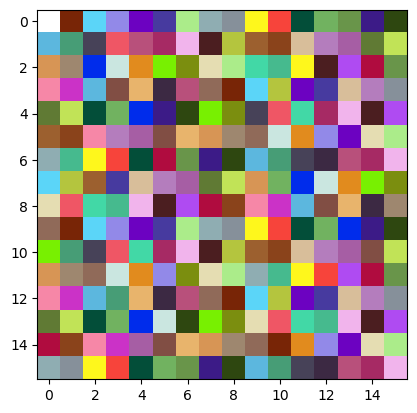

In [13]:
# Define napari colormap
values = np.linspace(0, 1, 10001)
vispy_cmap = label_colormap(50)
colors = vispy_cmap.map(values)
napari_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'napari_labels', list(zip(values, colors))
)
labels = np.arange(256).reshape((16, 16))
ldi = np.where(
    labels > 0,
    low_discrepancy_image(labels),
    0,
)

plt.imshow(ldi, cmap=napari_cmap, vmin=0, vmax=1)

Now the prediction is computed and the colormap applied to it.

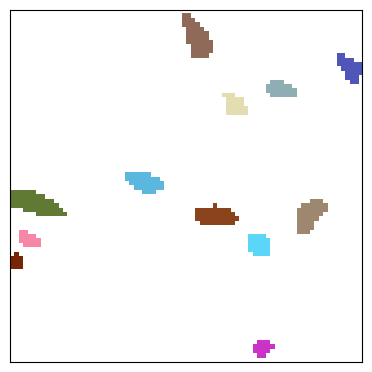

In [14]:
# Compute prediction
prediction = predict_image(image=test_image, classifier=quapos_lm)

# Define subplots for prediction
fig, axs = plt.subplots(1, 2, figsize=(10,10))

# Remove unwanted subplots slot
axs[1].remove()

# Show prediction
cle.imshow(prediction[15, 0:80, 0:80], plot=axs[0], colormap=napari_cmap)

# Remove ticks
axs[0].tick_params(left = False,
                right = False,
                labelleft = False,
                labelbottom = False, 
                bottom = False)

plt.savefig(save_path + "03-d-test-data-prediction.png",
            dpi=300,
            bbox_inches="tight")

#### Ground truth annotation

Now the ground truth annotation used for the comparison with its corresponding prediction will be loaded and visualised with the same colormap.

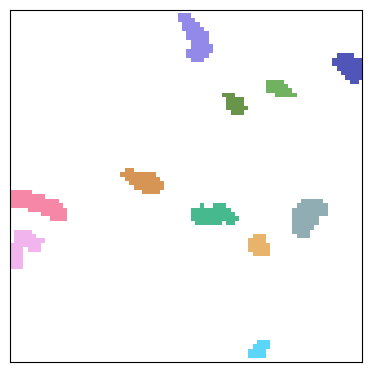

In [15]:
# Load ground truth
ground_truth_test_data = cle.imread(test_data + "e-annotation-ground-truth-person-a/e2.tif")

# Define subplots for prediction
fig, axs = plt.subplots(1, 2, figsize=(10,10))

# Remove unwanted subplots slot
axs[1].remove()

# Show prediction
cle.imshow(ground_truth_test_data[15, 0:80, 0:80], plot=axs[0], colormap=napari_cmap)

# Remove ticks
axs[0].tick_params(left = False,
                right = False,
                labelleft = False,
                labelbottom = False, 
                bottom = False)

plt.savefig(save_path + "03-e-test-data-annotation.png",
            dpi=300,
            bbox_inches="tight")